### Abstract

This week, we learned how to deal with different types of noise in CCD data. We started by taking bias frames and flat frames at 5 different exposures. We used techniques to find the mean bias and improve the flat frames. Then, we took dark frames at different temperatures. We used techniques we learned in the first part of the lab to estimate the band gap energy and coefficient from the dark current formula. We then compare the values we got to accepted values. We also comment on the linearity of the data taken with the CCD detector and the implied full well depth of the electrons. At the end, we compare the CCD at Angel Hall to the OSU 4K CCD.

### Introduction

CCD (Charge Coupled Device) detectors detect photons. The CCD is divided into many pixels that build up an image. The CCD detects photons that fall into the area defined by a pixel. Those photons are converted into electrons and the number of electrons is then recorded. The data is then read out using voltage differences.

A typical CCD is made of silicon. CCD detecting relies on the band gap structure of silicon. Some impurity atoms are added to the silicon atoms in the CCD. The number of electrons that 'jump up' is proportional to the number of incident photons. The freed electrons collect in potential wells and are collected when the data is read out.

CCD detectors are used in many telescopes today. There are several sources of noise that a CCD generates itself. This lab served to give us a more in depth understanding of how those noise sources impact the data, and how they can be subtracted out. The main sources of noise we study in this lab are read noise and dark curent.

In this lab, we take bias frames and flat fields in the first part. In the second part, we take bias frames and dark current frames. We take flat fields at 5 different brightness levels, which corresponds to 5 different exposure times (0.2 s, 0.4 s, 0.6 s, 0.8 s, 1 s). We take dark current images at 5 different temperatures (-16 C, -13 C, -10 C, -7 C, and -4 C).



### Theory

In the introduction we mentioned band gap. Basically, the addition of impurity atoms and the fact that silicon is a semi-conductor puts some space between the conduction band and the valence band. This means that if enough electrons fill up the lower states, electrons will be forced to jump up to the valence band where they can move freely. In terms of the CCD, silicon is special because its band gap is perfect so a photon of visible light that penetrates the material will cause an electron to jump up and join the current. Those electrons are what is read out by the CCD. The electrons gather in potential wells, where a changing voltage difference enables us to read out data from the CCD.

The read noise is a source of noise that causes the ADU recorded for each pixel to differ from the 'proper' ADU value given the charge deposited in the pixel. Even if there is no light hitting the CCD detector, some electrons will sit in the pixels. Read noise is constant, regardless of integration time. We get read noise from bias frames, but there are many ways to measure it from there. Bias frames are pictures taken with zero exposure time in a closed telescope. 

In this lab, we take the average of the sigma frame to get the read noise. We can then get the error in the mean by taking the standard deviation of the sigma frame. But we need to add a factor of square root of N. Every time we add samples (bias frames), the error in the mean goes down by square root of N. 

$$ RN = mean\;(sigma\; frame) $$

We can get the gain of the CCD using the mean and variance of the flat frames. 

$$N_{ADU} = \frac{N_{e -}}{g} $$

$$\sigma_{e} = \sqrt{N_e} $$

$$\sigma_{ADU} = \frac{\sqrt{N_e}}{g}$$

We can get the gain using the inverse of the slope of our variance vs mean in ADU. 

$$\sigma_{RN, e-} = g * \sigma_{RN, ADU} $$

$$ \sigma_{ADU} = \frac{\sqrt{N_{ADU}}}{g} $$

$$ slope = \frac{1}{g} $$

slope = 1 / g


Flat field corrections remove the pixel-to-pixel variations across the array. A flat field frame comes from photographing an evenly illuminated target at close range. At a certain temperature, the frames may be saturated, and the data may be non-linear.


Dark current noise comes from temperature. When you have long integration times, a significant amount of charge can build up due to thermal excitations. You can get a good measure of the dark current if you take a long exposure image in a closed telescope. 



The dark current is dependent on temperature. The formula for dark current is given by:

$$ A * T^{3/2} * e^{\frac{-E_g}{2 k T}} $$

where $E_g$ is the band gap (in eV) for silicon, k is the boltzmann constant, and T is the temperature in Kelvin.

In this lab, we end up with 5 data points, one point for the dark current at every temperature.

The full well depth of electrons refers to the largest charge a pixel can hold before that pixel becomes saturated. When the saturation level is exceeded, electrons begin to fill nearby pixels. When the full well depth of electrons is exceeded, the data becomes non-linear and the signal is degraded.

### Experiment and Methodology

In [473]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np #all my imports

First, we need to create an array with all the bias frames we took in lab. In the next line of code, I add all the bias frames to one bias array.

In [474]:
bias = [] #creating the array for the bias images
for i in range(1,10):
    bias.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/bias.0000000"+str(i)+".fit"))
for i in range(11,20):
    bias.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/bias.000000"+str(i)+".fit"))
for i in range(21, 26):
    bias.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/bias.000000"+str(i)+".fit"))
    

The read noise will be the average of the sigma frame. The next bit of code creates the sigma frame.

In [475]:
# Measure the shape of your arrays 
height, width = bias[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr = np.zeros((height, width)) # initialize arrays
std_arr = np.zeros((height, width))  

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in bias] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr[j,k] = pix_values.mean()
        std_arr[j,k] = pix_values.std()
        

Creating this sigma frame gives us the opportunity to not only get the read noise, but also an error estimate in said read noise. 

In [476]:
read_noise = np.average(std_arr) #read noise is average of sigma frame
error = np.std(std_arr)/np.sqrt(len(bias)) #error needs factor of 1/square root of N
print("The read noise is then ", read_noise, "with an error of ", error,".")

The read noise is then  94.8576783699 with an error of  2.975029985 .


Now we read in all the flat frames and subtract the mean of the bias frames. This gives us the noise that is only coming from pixel-to-pixel variation.

In [477]:
flats_1 = [] #creating arrays for the flat frames
flats_2 = []
flats_3 = []
flats_4 = []
flats_5 = []

for i in range(1,6): #creating a 
    flats_1.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/flat.0000000"+str(i)+".fit"))
for i in range(6, 10):
    flats_2.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/flat.0000000"+str(i)+".fit"))
flats_2.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/flat.00000010.fit")) #flat....10 has less 0's than the others so I needed to add it in separately

for i in range(11, 16):
    flats_3.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/flat.000000"+str(i)+".fit"))
for i in range(16, 21):
    flats_4.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/flat.000000"+str(i)+".fit"))
for i in range(21, 26):
    flats_5.append(fits.getdata("/Users/bangkung5/lab4/lab-4-ccd/flats/flat.000000"+str(i)+".fit"))

Now let's look at linearity. We can determine linearity from looking at the exposure times of the flats and the mean of those flats.

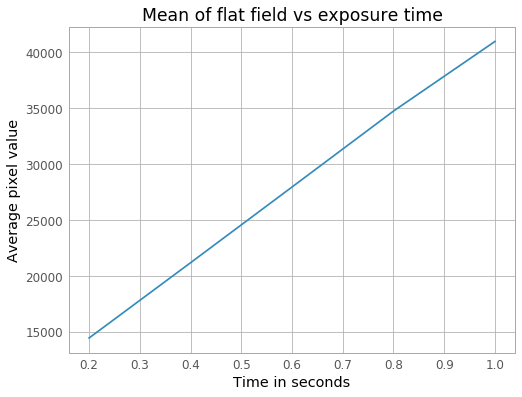

In [478]:
#The next bit of code gives us an average pixel value for each frame
flats_array = [np.average(flats_1), np.average(flats_2), np.average(flats_3), np.average(flats_4), np.average(flats_5)]
#this is the exposure time for each flat
time = [0.2, 0.4, 0.6, 0.8, 1.0]

plt.xlabel('Time in seconds')
plt.ylabel('Average pixel value')
plt.title('Mean of flat field vs exposure time')
plt.plot(time, flats_array)

This shows us that the data from the flat fields is pretty linear. The next bit of code creates mean and sigma arrays for each of the flat frames.

In [479]:
# Measure the shape of your arrays 
height, width = flats_1[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr_1 = np.zeros((height, width)) # initialize arrays
std_arr_1 = np.zeros((height, width))  

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in flats_1] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr_1[j,k] = pix_values.mean()
        std_arr_1[j,k] = pix_values.std()
        
# Measure the shape of your arrays 
height, width = flats_2[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr_2 = np.zeros((height, width)) # initialize arrays
std_arr_2 = np.zeros((height, width))  

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in flats_2] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr_2[j,k] = pix_values.mean()
        std_arr_2[j,k] = pix_values.std()
        
# Measure the shape of your arrays 
height, width = flats_3[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr_3 = np.zeros((height, width)) # initialize arrays
std_arr_3 = np.zeros((height, width))  

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in flats_3] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr_3[j,k] = pix_values.mean()
        std_arr_3[j,k] = pix_values.std()
        
# Measure the shape of your arrays 
height, width = flats_4[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr_4 = np.zeros((height, width)) # initialize arrays
std_arr_4 = np.zeros((height, width))  

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in flats_4] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr_4[j,k] = pix_values.mean()
        std_arr_4[j,k] = pix_values.std()
        
# Measure the shape of your arrays 
height, width = flats_5[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr_5 = np.zeros((height, width)) # initialize arrays
std_arr_5 = np.zeros((height, width))  

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in flats_5] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr_5[j,k] = pix_values.mean()
        std_arr_5[j,k] = pix_values.std()

This next bit of code gives us a mean and variance arrays for the flat frames that have been corrected. (I'm not sure if this technique or the next one is right... but I'm going to leave it...)

[2727.9351141933398, 9454.0636697665141, 16221.477210277062, 23007.697251501093, 29230.102008120724] [96.821179732850695, 5063.0566788070264, 7575.8229297977914, 11069.501532699462, 6731.2563270021828]


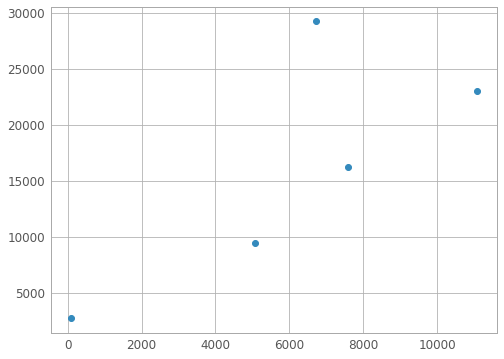

In [480]:
x1 = np.average(mean_arr_1-mean_arr)
x2 = np.average(mean_arr_2)-np.average(mean_arr)
x3 = np.average(mean_arr_3)-np.average(mean_arr)
x4 = np.average(mean_arr_4)-np.average(mean_arr)
x5 = np.average(mean_arr_5)-np.average(mean_arr)

y1 = (np.average(std_arr_1)-np.average(std_arr))**2
y2 = (np.average(std_arr_2)-np.average(std_arr))**2
y3 = (np.average(std_arr_3)-np.average(std_arr))**2
y4 = (np.average(std_arr_4)-np.average(std_arr))**2
y5 = (np.average(std_arr_5)-np.average(std_arr))**2

x = [x1, x2, x3, x4, x5]
y = [y1, y2, y3, y4, y5]


slope_array = [(flats5-flats4)/(N5-N4), (flats4-flats3)/(N4-N3), (flats3-flats2)/(N3-N2), (flats2-flats1)/(N2-N1)]
gain = 1/(np.average(slope_array))

print(x,y)
plt.scatter(y,x)

In [481]:
for j in range(height): #subtracting mean bias from all the flat frames
    for k in range(0,width):
        for i in range(0, len(flats_1)):
            flats_1[i][j,k] -= mean_arr[j,k]
            flats_2[i][j,k] -= mean_arr[j,k]
            flats_3[i][j,k] -= mean_arr[j,k]
            flats_4[i][j,k] -= mean_arr[j,k]
            flats_5[i][j,k] -= mean_arr[j,k]
            

The next bits of code give us the means and variances of the corrected flat frames.

In [482]:
flats1 = np.var(flats_1)/np.sqrt(len(bias))
flats2 = np.var(flats_2)/np.sqrt(len(bias))
flats3 = np.var(flats_3)/np.sqrt(len(bias))
flats4 = np.var(flats_4)/np.sqrt(len(bias))
flats5 = np.var(flats_5)/np.sqrt(len(bias))

N1 = np.average(flats_1)
N2 = np.average(flats_2)
N3 = np.average(flats_3)
N4 = np.average(flats_4)
N5 = np.average(flats_5)

flats_array = [flats1, flats2, flats3, flats4]
N_array = [N1, N2, N3, N4]

Now that we have the variances and means, we can plot the five data points. The slope of this line gives us 1/gain. 

The gain is  0.889893290768


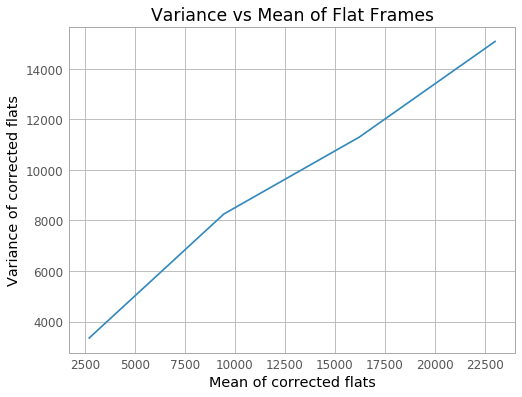

In [483]:
plt.plot(N_array, flats_array)
slope_array = [(flats5-flats4)/(N5-N4), (flats4-flats3)/(N4-N3), (flats3-flats2)/(N3-N2), (flats2-flats1)/(N2-N1)]
gain = 1/(np.average(slope_array))
print("The gain is ", gain)
plt.title("Variance vs Mean of Flat Frames")
plt.xlabel("Mean of corrected flats")
plt.ylabel("Variance of corrected flats")
plt.show()



In [484]:
print(read_noise*gain)

84.4132115591


This graph gives us the again. From before, we can see that the data is linear. This shows that we haven't reached the saturation point of the CCD yet, which is accurate since we were told so. As you can see in the cell above, the read noise in electrons is 17.6. This is very good for a CCD (in class, we saw that a read noise of 1 was excellent, and 1000 was usual for IR). The gain is 0.88 which seems high.

Now, we move on to the dark current frames. We start using the same techniques used above. We will get a mean bias from the bias frames, and subtract the mean bias from the dark current frames. Then we will take the average. This will give us 5 data points for 5 temperatures. From these five data points we will fit a curve and get estimated values for the coefficient and the band gap for silicon.

The next bit of code reads in all the bias and dark frames.

In [485]:
bias16 = []
for i in range(1,10):
    bias16.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias16.0000000"+str(i)+".HIP 79622.Bias.fit"))
bias16.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias16.00000010.HIP 79622.Bias.fit"))

bias13 = []
for i in range(1,10):
    bias13.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias13.0000000"+str(i)+".HIP 79622.Bias.fit"))
bias13.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias13.00000010.HIP 79622.Bias.fit"))

bias10 = []
for i in range(1,10):
    bias10.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias10.0000000"+str(i)+".HIP 79622.Bias.fit"))
bias10.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias10.00000010.HIP 79622.Bias.fit"))
    
bias7 = []
for i in range(1,10):
    bias7.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias7.0000000"+str(i)+".HIP 79622.Bias.fit"))
bias7.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias7.00000010.HIP 79622.Bias.fit"))

bias4 = []
for i in range(1,10):
    bias4.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias4.0000000"+str(i)+".HIP 79622.Bias.fit"))
bias4.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/bias4.00000010.HIP 79622.Bias.fit"))

In [486]:
dark16 = []
for i in range(1,6):
    dark16.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/dark16.0000000"+str(i)+".HIP 79622.Dark.fit"))

dark13 = []
for i in range(1,6):
    dark13.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/dark13.0000000"+str(i)+".HIP 79622.Dark.fit"))

dark10 = []
for i in range(1,6):
    dark10.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/dark10.0000000"+str(i)+".HIP 79622.Dark.fit"))
    
dark7 = []
for i in range(1,6):
    dark7.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/dark7.0000000"+str(i)+".HIP 79622.Dark.fit"))

dark4 = []
for i in range(1,6):
    dark4.append(fits.getdata(r"/Users/bangkung5/lab4/lab-4-ccd/darks/dark4.0000000"+str(i)+".HIP 79622.Dark.fit"))

This bit of code is creating a mean value array for all the dark frames that we took. 

In [487]:
# Measure the shape of your arrays (they are all the same)
height, width = dark10[0].shape
print(height, width)

# Make pixel-wise mean and standard deviation arrays
mean_arr_16 = np.zeros((height, width)) # initialize containers for data storage
print(len(mean_arr_16), height, width)
for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in dark16] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr_16[j,k] = pix_values.mean()

# Repeating for T = -13 C
mean_arr_13 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in dark13] 
        pix_values = np.array(pix_values) 
        mean_arr_13[j,k] = pix_values.mean()
        
# Repeating for T = -10 C
mean_arr_10 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in dark10] 
        pix_values = np.array(pix_values) 
        mean_arr_10[j,k] = pix_values.mean()

# Repeating for T = -7 C
mean_arr_7 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in dark7] 
        pix_values = np.array(pix_values) 
        mean_arr_7[j,k] = pix_values.mean()
        
# Repeating for T = -4 C
mean_arr_4 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in dark4] 
        pix_values = np.array(pix_values) 
        mean_arr_4[j,k] = pix_values.mean()


53 119
53 53 119


The next bit of code is doing the same with the bias frames.

In [488]:
# Measure the shape of your arrays (they are all the same)
height, width = bias10[0].shape
print(height, width)

# Make pixel-wise mean and standard deviation arrays
meanbias_arr_16 = np.zeros((height, width)) # initialize containers for data storage
print(len(meanbias_arr_16), height, width)
for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in bias16] #creating list of new values
        pix_values = np.array(pix_values) # convert list to an array
        meanbias_arr_16[j,k] = pix_values.mean()

# Repeating for T = -13 C
meanbias_arr_13 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in bias13] 
        pix_values = np.array(pix_values) 
        meanbias_arr_13[j,k] = pix_values.mean()
        
# Repeating for T = -10 C
meanbias_arr_10 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in bias10] 
        pix_values = np.array(pix_values) 
        meanbias_arr_10[j,k] = pix_values.mean()

# Repeating for T = -7 C
meanbias_arr_7 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in bias7] 
        pix_values = np.array(pix_values) 
        meanbias_arr_7[j,k] = pix_values.mean()
        
# Repeating for T = -4 C
meanbias_arr_4 = np.zeros((height, width)) 

for j in range(height):
    for k in range(width):
        pix_values = [arr[j,k] for arr in bias4] 
        pix_values = np.array(pix_values) 
        meanbias_arr_4[j,k] = pix_values.mean()

53 119
53 53 119


This next bit of code is creating the darks_array. We take the mean of the dark frames and subtract the mean of the bias frames.

In [489]:
x1 = mean_arr_16 - meanbias_arr_16
x2 = mean_arr_13 - meanbias_arr_13
x3 = mean_arr_10 - meanbias_arr_10
x4 = mean_arr_7 - meanbias_arr_7
x5 = mean_arr_4 - meanbias_arr_4
darks_array = [x1, x2, x3, x4, x5]

Now we can fit the curve to find A and E_g.

In [490]:
# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 
T = [-16, -13, -10, -7, -4] #the temperatures we took dark current measurements at
temp = np.array([T+273 for T in T]) #changing temperature to kelvin to get the right units

# choose the function to be fitted... 
def func (A, x, E_g):
    k = 8.617e-5
    return (A*x**(3/2)*np.exp(-E_g/(2*k*x))) #I have temp*np.sqrt(temp) because otherwise the code is angry

# ...and provide initial estimates for the parameters
A_0, E_g_0 = (6, 1)

# manually fit the curve to obtain a viable set of starting parameters
A_t, E_gt = (10,2)

# exectute the curve fit...
coeffs, fiterr = curve_fit(func, temp, darks_array, p0=(A0, E_g_0))

# ...and plot the results
print ("A=%s, E_g=%s" % (coeffs[0], coeffs[1]))
plt.plot(temp, darks_array, '+')
plt.plot(temp,func(temp,*coeffs),'r.')
plt.show()


ValueError: operands could not be broadcast together with shapes (5,) (5,53,119) 

The data fits the curve we would expect it to. (Unfortunately the code doesn't work...) This makes sense because we didn't get up to the saturation temperature of 2 degrees C.

I _should have gotten_ E_g about 1.1 eV. And A should be around 1.3 e7. I got that number from plugging the equation into a graphing software and figuring out what constants I should be getting.

The gain of the OSU CCD is 2.2-2.4 e- per ADU, which is more than the gain that we got. The read noise for the OSU CCD is 5 electrons, which is much much better than the read noise we got. The linearity is linearity to a high ADU. The Angell Hall CCD might have a smaller full well depth.

### Summary

In this week's lab, we took bias frames and flat frames are different exposure time. We took the exposure times of 0.2, 0.4, 0.6, 0.8, and 1.0 seconds, with the exposure reaching saturation at 1.0 seconds. We used the standard deviation of the bias frames to find the read noise. We subtracted the mean bias from the flat frames, then used the standard deviation and mean of the corrected flat frames to find the gain.

Then, we analysed the dark current from sets of five darks and ten biases taken at -4, -7, -10, -13, and -16 degrees C. The dark current was calculated by subtracting the mean of the bias frames from that of the darks. 

We can use the values we got to make some comments on the CCD. The read noise in electrons was BLABLA which means that the CCD is pretty good. The data was linear, which implied we hadn't reached full well depth of electrons in the CCD. 

### Conclusion

We can conclude that the Angell Hall CCD has a reasonable read noise and gain. The problems with my code were unfortunate. I know that we should should get a gain of 0.3-0.8.

Also, the dark current code never worked. Since we took data covering the doubling point (twice over) of the dark current, we would expect to get a decent fit from the data. The existence of dark current implies that a better cooling system would be effective, however impractical at the school observatory. The values of A and E_g should correspond to 1.3e7 and 1.1 eV.